# United States Hate Crime Relational Analysis

## The following script contains:
### 01. Importing Data
### 02. Exploring Relationships

In [1]:
# import libraries
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

In [2]:
# Check matplotlib version
matplotlib.__version__

'3.2.2'

In [3]:
# This option ensures the charts you create are displayed in the notebook without the need to "call" them specifically.

%matplotlib inline

### 01. Importing Data

In [4]:
# turn folders into string
path = r'C:\\Users\\Jamie&Ken\\Desktop\\Data Analytics Course\\Advanced Analytics & Dashboard Design\\10-2024 American Hate Crime'
# Import data
df = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'hate_crime_wrangled.csv'))

In [5]:
# Check import
df.shape

(199797, 21)

In [6]:
#Check df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199797 entries, 0 to 199796
Data columns (total 21 columns):
 #   Column                 Non-Null Count   Dtype 
---  ------                 --------------   ----- 
 0   INCIDENT_ID            199797 non-null  int64 
 1   DATA_YEAR              199797 non-null  int64 
 2   ORI                    199797 non-null  object
 3   PUB_AGENCY_NAME        199797 non-null  object
 4   AGENCY_TYPE_NAME       199797 non-null  object
 5   STATE_ABBR             199797 non-null  object
 6   STATE_NAME             199797 non-null  object
 7   DIVISION_NAME          199797 non-null  object
 8   REGION_NAME            199797 non-null  object
 9   POPULATION_GROUP_CODE  199797 non-null  object
 10  POPULATION_GROUP_DESC  199797 non-null  object
 11  INCIDENT_DATE          199797 non-null  object
 12  TOTAL_OFFENDER_COUNT   199797 non-null  int64 
 13  OFFENDER_RACE          199797 non-null  object
 14  VICTIM_COUNT           199797 non-null  int64 
 15  

In [7]:
df.head()

,INCIDENT_ID,DATA_YEAR,ORI,PUB_AGENCY_NAME,AGENCY_TYPE_NAME,STATE_ABBR,STATE_NAME,DIVISION_NAME,REGION_NAME,POPULATION_GROUP_CODE,...,INCIDENT_DATE,TOTAL_OFFENDER_COUNT,OFFENDER_RACE,VICTIM_COUNT,OFFENSE_NAME,LOCATION_NAME,BIAS_DESC,VICTIM_TYPES,MULTIPLE_OFFENSE,MULTIPLE_BIAS
0,3015,1991,AR0040200,Rogers,City,AR,Arkansas,West South Central,South,5,...,8/31/1991,1,White,1,Intimidation,Highway/Road/Alley/Street/Sidewalk,Anti-Black or African American,Individual,S,S
1,3016,1991,AR0290100,Hope,City,AR,Arkansas,West South Central,South,6,...,9/19/1991,1,Black or African American,1,Simple Assault,Highway/Road/Alley/Street/Sidewalk,Anti-White,Individual,S,S
2,43,1991,AR0350100,Pine Bluff,City,AR,Arkansas,West South Central,South,3,...,7/4/1991,1,Black or African American,1,Aggravated Assault,Residence/Home,Anti-Black or African American,Individual,S,S
3,44,1991,AR0350100,Pine Bluff,City,AR,Arkansas,West South Central,South,3,...,12/24/1991,1,Black or African American,2,Aggravated Assault;Destruction/Damage/Vandalis...,Highway/Road/Alley/Street/Sidewalk,Anti-White,Individual,M,S
4,3017,1991,AR0350100,Pine Bluff,City,AR,Arkansas,West South Central,South,3,...,12/23/1991,1,Black or African American,1,Aggravated Assault,Service/Gas Station,Anti-White,Individual,S,S


In [8]:
# Get column names
df.columns

Index(['INCIDENT_ID', 'DATA_YEAR', 'ORI', 'PUB_AGENCY_NAME',
       'AGENCY_TYPE_NAME', 'STATE_ABBR', 'STATE_NAME', 'DIVISION_NAME',
       'REGION_NAME', 'POPULATION_GROUP_CODE', 'POPULATION_GROUP_DESC',
       'INCIDENT_DATE', 'TOTAL_OFFENDER_COUNT', 'OFFENDER_RACE',
       'VICTIM_COUNT', 'OFFENSE_NAME', 'LOCATION_NAME', 'BIAS_DESC',
       'VICTIM_TYPES', 'MULTIPLE_OFFENSE', 'MULTIPLE_BIAS'],
      dtype='object')

In [9]:
# Create subset excluding categorical variables
sub = df[['TOTAL_OFFENDER_COUNT', 'VICTIM_COUNT']]

In [10]:
# Create a correlation matrix using pandas
sub.corr()

,TOTAL_OFFENDER_COUNT,VICTIM_COUNT
TOTAL_OFFENDER_COUNT,1.000000,0.115758
VICTIM_COUNT,0.115758,1.000000


In [11]:
# check subset
sub.shape

(199797, 2)

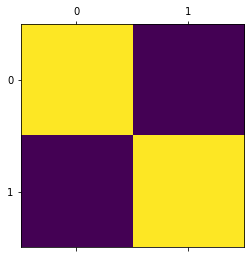

In [12]:
# Create a correlation heatmap using matplotlib
plt.matshow(sub.corr())
plt.show()

Text(0.5, 2.3, 'Correlation Matrix')

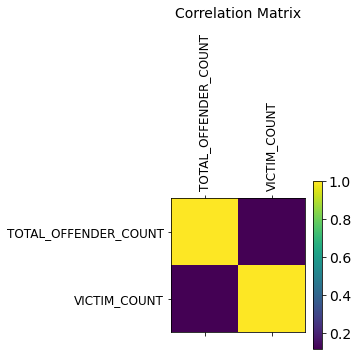

In [14]:
# Add labels, a legend and change the size of heatmap

f = plt.figure(figsize=(3, 3)) # figure size 
plt.matshow(sub.corr(), fignum=f.number) # type of plot
plt.xticks(range(sub.shape[1]), sub.columns, fontsize=12, rotation = 90) # x axis labels
plt.yticks(range(sub.shape[1]), sub.columns, fontsize=12) # y axis labels
cb = plt.colorbar() # add a colour legend (called colorbar)
cb.ax.tick_params(labelsize=14) # add font size
plt.title('Correlation Matrix', fontsize=14, y=2.3) # add title

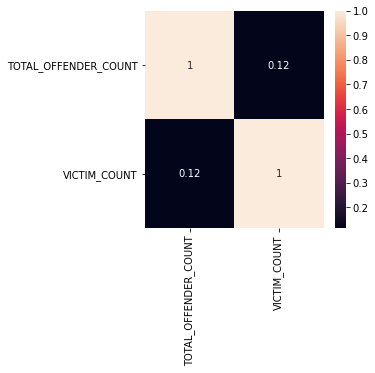

In [15]:
# creating subplot with matplotlib
f,ax = plt.subplots(figsize=(4,4))

# corelation heatmap in seaborn
corr = sns.heatmap(sub.corr(), annot = True, ax = ax)

#### There is weak correlation between the two variables meaning that there is likely no relationship between the number of offenders and the number of victims. 

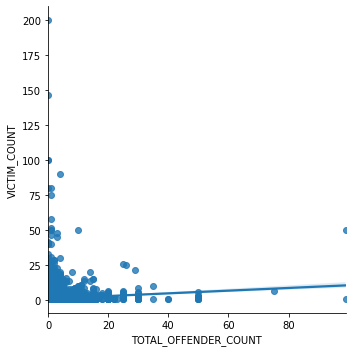

In [16]:
# Scatterplot for the "TOTAL_OFFENDER_COUNT" and the "VICTIM_COUNT"
sns.lmplot(x='TOTAL_OFFENDER_COUNT', y ='VICTIM_COUNT', data = df)

#### There is an upward trend to the line. Majority of the points are clustered at the beginning. Most points are close to the line with a few outliers. Based on this scatterplot, there seems to be a positive relationship, thoughyy it is weak.

In [18]:
# Double check variables to be used in pair plot
sub.columns

Index(['TOTAL_OFFENDER_COUNT', 'VICTIM_COUNT'], dtype='object')

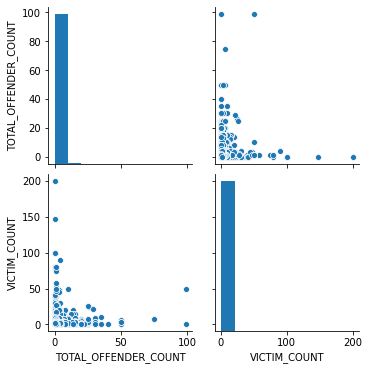

In [19]:
# Create pair plot
g = sns.pairplot(sub)

#### As discovered earlier, there is weak correlation

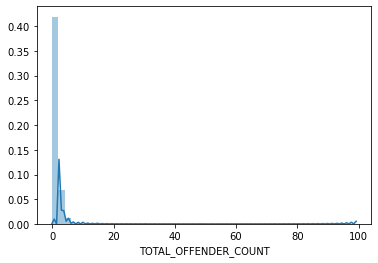

In [21]:
# Create a categorical plot splitting total offender count into categories
sns.distplot(df['TOTAL_OFFENDER_COUNT'], bins = 50, kde = True)

In [27]:
# Create categories
df.loc[df['TOTAL_OFFENDER_COUNT'] ==1, 'Offender Count Category'] = 'Single Offender'

In [28]:
df.loc[df['TOTAL_OFFENDER_COUNT'] == 2, 'Offender Count Category'] = 'Paired Offense'

In [26]:
df.loc[(df['TOTAL_OFFENDER_COUNT'] > 2) & (df['TOTAL_OFFENDER_COUNT'] <=5),'Offender Count Category'] = 'Small Group Offense'

In [29]:
df.loc[df['TOTAL_OFFENDER_COUNT'] > 5, 'Offender Count Category'] = 'Large Group Offense'

In [30]:
df['TOTAL_OFFENDER_COUNT'].value_counts(dropna = False)

1     92126
0     73732
2     18809
3      8049
4      3422
5      1638
6       777
7       296
8       254
10      208
9       110
15      104
12       69
20       52
11       49
30       21
13       21
25       12
16       10
50        8
14        8
18        5
22        4
35        2
40        2
17        2
99        2
23        1
21        1
26        1
29        1
75        1
Name: TOTAL_OFFENDER_COUNT, dtype: int64

In [31]:
# Confirm new category column
df.columns

Index(['INCIDENT_ID', 'DATA_YEAR', 'ORI', 'PUB_AGENCY_NAME',
       'AGENCY_TYPE_NAME', 'STATE_ABBR', 'STATE_NAME', 'DIVISION_NAME',
       'REGION_NAME', 'POPULATION_GROUP_CODE', 'POPULATION_GROUP_DESC',
       'INCIDENT_DATE', 'TOTAL_OFFENDER_COUNT', 'OFFENDER_RACE',
       'VICTIM_COUNT', 'OFFENSE_NAME', 'LOCATION_NAME', 'BIAS_DESC',
       'VICTIM_TYPES', 'MULTIPLE_OFFENSE', 'MULTIPLE_BIAS',
       'Offender Count Category'],
      dtype='object')

In [32]:
df.head()

,INCIDENT_ID,DATA_YEAR,ORI,PUB_AGENCY_NAME,AGENCY_TYPE_NAME,STATE_ABBR,STATE_NAME,DIVISION_NAME,REGION_NAME,POPULATION_GROUP_CODE,...,TOTAL_OFFENDER_COUNT,OFFENDER_RACE,VICTIM_COUNT,OFFENSE_NAME,LOCATION_NAME,BIAS_DESC,VICTIM_TYPES,MULTIPLE_OFFENSE,MULTIPLE_BIAS,Offender Count Category
0,3015,1991,AR0040200,Rogers,City,AR,Arkansas,West South Central,South,5,...,1,White,1,Intimidation,Highway/Road/Alley/Street/Sidewalk,Anti-Black or African American,Individual,S,S,Single Offender
1,3016,1991,AR0290100,Hope,City,AR,Arkansas,West South Central,South,6,...,1,Black or African American,1,Simple Assault,Highway/Road/Alley/Street/Sidewalk,Anti-White,Individual,S,S,Single Offender
2,43,1991,AR0350100,Pine Bluff,City,AR,Arkansas,West South Central,South,3,...,1,Black or African American,1,Aggravated Assault,Residence/Home,Anti-Black or African American,Individual,S,S,Single Offender
3,44,1991,AR0350100,Pine Bluff,City,AR,Arkansas,West South Central,South,3,...,1,Black or African American,2,Aggravated Assault;Destruction/Damage/Vandalis...,Highway/Road/Alley/Street/Sidewalk,Anti-White,Individual,M,S,Single Offender
4,3017,1991,AR0350100,Pine Bluff,City,AR,Arkansas,West South Central,South,3,...,1,Black or African American,1,Aggravated Assault,Service/Gas Station,Anti-White,Individual,S,S,Single Offender


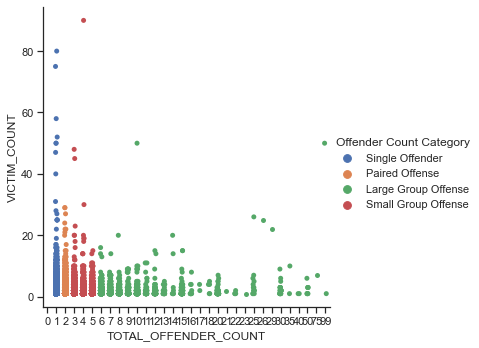

In [33]:
#Create categorical plot in seaborn using offender count category created above
sns.set(style="ticks")
g = sns.catplot(x="TOTAL_OFFENDER_COUNT", y="VICTIM_COUNT", hue="Offender Count Category", data=df)

In [34]:
# Create victim count categories
df.loc[df['VICTIM_COUNT'] < 2, 'Individual Victim Category'] = 'Low Victim Count'

In [35]:
df.loc[(df['VICTIM_COUNT'] >= 2) & (df['VICTIM_COUNT'] < 10),'Individual Victim Category'] = 'Median Victim Count' 

In [36]:
df.loc[df['VICTIM_COUNT'] >= 10, 'Individual Victim Category'] = 'High Victim Count'

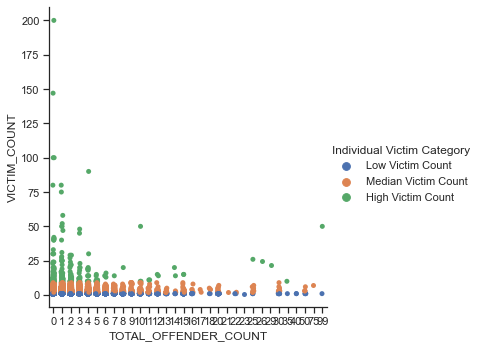

In [37]:
sns.set(style="ticks")
g = sns.catplot(x="TOTAL_OFFENDER_COUNT", y="VICTIM_COUNT", hue="Individual Victim Category", data=df)

###  QUESTIONS TO EXPLORE
1. What type of hate crimes are more prevalent throughout 1991-2018. 
1a.	Additionally, consider comparison over 3 decades. 1991-1999, 2000-2009, and 2010-2018.
2. 	How has hate crime behaved over the years, an increase or decrease of incidence?
3. 	Which ethnic group was most affected by hate crimes, which was least affected?
4.	Which states have the largest incidence of hate crime?
5.	What types of hate crime was most common?
6. How many offenders are typically involved?


### Possible Hypothesis
From the results, I have not determined a good hypothesis as the relationship is weak. That being said we could look into as the amount of offenders increases, the victim count increses.

##### I am not exporting this data with the new categories as I am not certain if they are valuable to me yet. I will return to this notebook should I need decide to use these images. 